In [9]:
# Import Libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.tools.visualization import plot_histogram

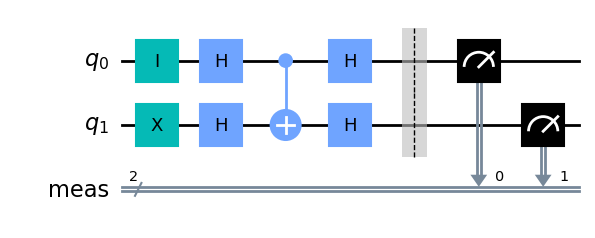

In [2]:
qc = QuantumCircuit(2)
qc.x(1)
qc.i(0)
qc.h([0,1])
qc.cx(0,1)
qc.h([0,1])
qc.measure_all()
qc.draw('mpl')

In [3]:
simulator = Aer.get_backend("aer_simulator") # simulasi kuantum dilakukan di komputer lokal
qc.save_statevector()
tqc = transpile(qc, simulator)
job = simulator.run(tqc)
result = job.result()
statevector = result.get_statevector(tqc, 4)
print(statevector)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j],
            dims=(2, 2))


{'11': 1000}


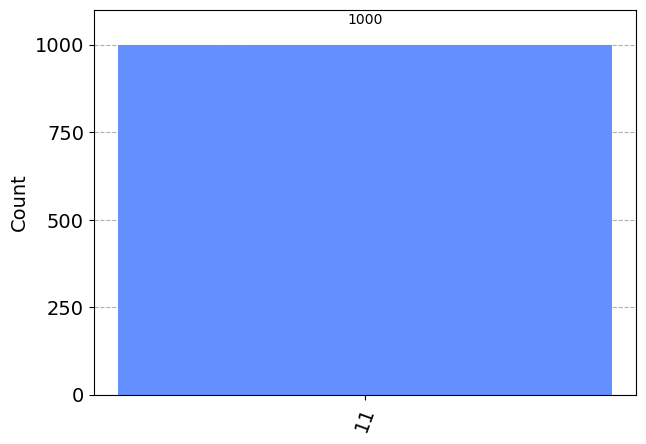

In [4]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
# Return counts
counts = job.result().get_counts(qc)
print(counts)
plot_histogram(counts)

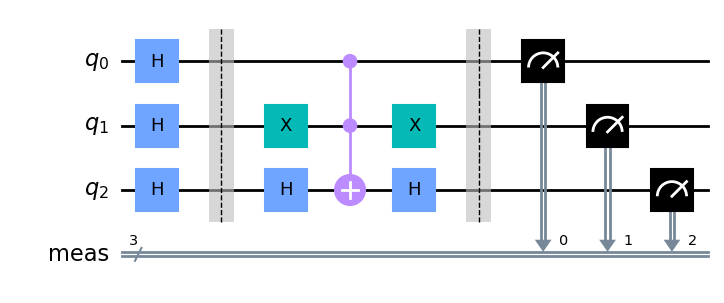

In [5]:
qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.barrier()
qc.x(1)
qc.h(2)
qc.ccx(0,1,2)
qc.x(1)
qc.h(2)
qc.measure_all()
qc.draw('mpl')


In [6]:
simulator = Aer.get_backend("aer_simulator") # simulasi kuantum dilakukan di komputer lokal
qc.save_statevector()
tqc = transpile(qc, simulator)
job = simulator.run(tqc)
result = job.result()
statevector = result.get_statevector(tqc, 4)
print(statevector)

Statevector([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
              0.+0.j],
            dims=(2, 2, 2))


{'101': 106, '011': 145, '111': 132, '000': 134, '010': 125, '001': 102, '100': 123, '110': 133}


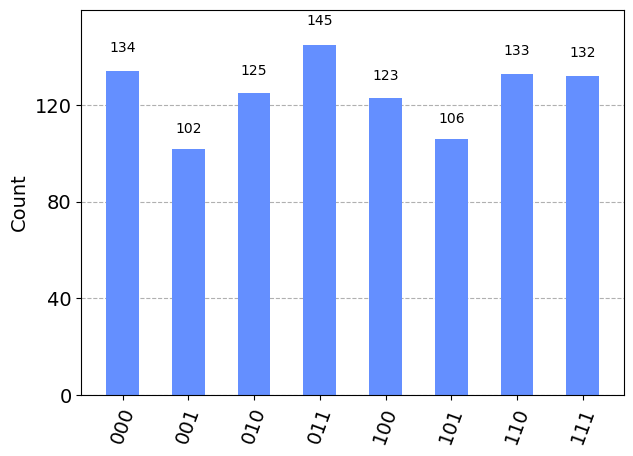

In [7]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
# Return counts
counts = job.result().get_counts(qc)
print(counts)
plot_histogram(counts)

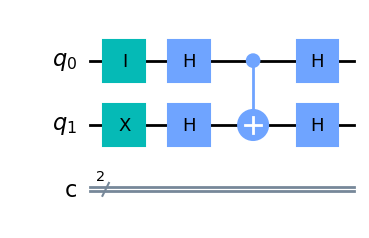

In [41]:
# Membuat register kuantum dan register klasik
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')

# Membuat sirkuit kuantum dengan register kuantum dan klasik yang telah dibuat
qc = QuantumCircuit(qr, cr)

qc.i(qr[0])
qc.x(qr[1])
qc.h(qr[0])
qc.h(qr[1])
qc.cx(qr[0],qr[1])
qc.h(qr[0])
qc.h(qr[1])


# Menggambar sirkuit kuantum
qc.draw('mpl')

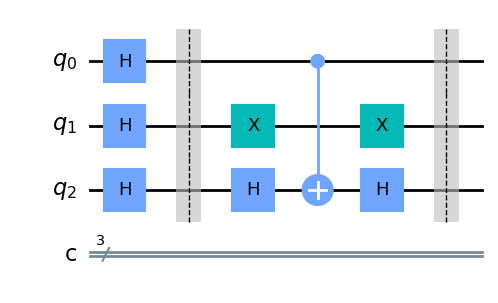

In [50]:
# Membuat register kuantum dan register klasik
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')

# Membuat sirkuit kuantum dengan register kuantum dan klasik yang telah dibuat
qc = QuantumCircuit(qr, cr)


qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.barrier()
qc.x(qr[1])
qc.h(qr[2])
qc.cx(qr[0:1], qr[2])
qc.x(qr[1])
qc.h(qr[2])
qc.barrier()

# Menggambar sirkuit kuantum
qc.draw('mpl')

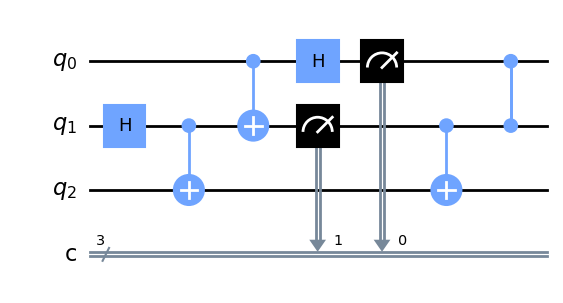

In [51]:
# Membuat register kuantum dan register klasik
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')

# Membuat sirkuit kuantum dengan register kuantum dan klasik yang telah dibuat
qc = QuantumCircuit(qr, cr)

qc.h(qr[1])
qc.cx(qr[1], qr[2])
qc.cx(qr[0], qr[1])
qc.measure(qr[1], cr[1])
qc.h(qr[0])
qc.measure(qr[0], cr[0])
qc.cx(qr[1], qr[2])
qc.cz(qr[0], qr[1])

# Menggambar sirkuit kuantum
qc.draw('mpl')